# In Class Assignment October 24, 2019
The goal of this in class assignment is to have you work with functional programming, pandas dataframes, and importing data. Complete the following tasks below, change the file name to your own, and upload your completed notebook to the teams page. 

### Part 1: Importing the Data
Simply run the cell below to import and format the data to the necessary dataframes

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tower = pd.read_csv('data/tower_data.csv')
source = pd.read_csv('data/source_data.csv',names = ['EPOCH_TIME','CO2','Local_DT'])
source['Local_DT'] = pd.to_datetime(source['Local_DT'])
tower['Local_DT'] = pd.to_datetime(tower['Local_DT'])
tower['direction'] = tower.apply(lambda row: np.arctan2(row['ANEM_X'],row['ANEM_Y'])/np.pi*180,axis=1)
tower['speed'] = tower.apply(lambda row: np.sqrt(row['ANEM_X']**2+row['ANEM_Y']**2),axis = 1)

### Part 2: Write a Plotting Function
Write a function that takes two inputs: a dataframe object, and a string corresponding to a column of the dataframe (in the form 'blah'). The function should plot the datetime on the x axis, and whatever the input string is on the y axis. For example, if you were to run your function with the input

**plotting_func(tower,'CO2')**

The function should output a plot of CO2 with respect to time. 

In [ ]:
#Your Function Here
def plotting_func(#name your variables here):
    #write your function here

In [4]:
#Answer
def plotting_func(dataframe,y_axis):
    fig,ax = plt.subplots()
    ax.plot(dataframe['Local_DT'],dataframe[y_axis])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.gcf().autofmt_xdate() #get a nice date format for the x axis
    ax.set_title('{} Versus Time'.format(y_axis))
    ax.set_xlabel('Time')
    ax.set_ylabel(y_axis)
    plt.show()

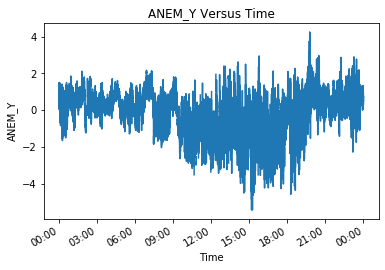

In [6]:
#test run your function here
plotting_func(tower,'ANEM_Y')

### Part 3: Write a "Clipping" function
Let's say we want to plot only a portion of the data. We need to figure out how to "clip" the data betweeen two datetimes. Write a function that takes in THREE inputs - a dataframe (that includes a Local_DT column like "tower" does), time1, and time2. The function should **return** a dataframe that only includes values between the two times you input. 

Hint 1: Look for a way to do this the "loc" feature of your dataframe. Example: **df.loc[df['col1']>2]** will return all values in df where the values in 'col1' of the df are greater than 2. Another option would be pd.where, but you will have to figure out how to deal with the NaN values this function creates. 

Hint 2: When inputting datetimes into this function, you will likely want to input them within a single quote such as '2018-09-05 08:00:00'

In [ ]:
#Your Function Here
def clip_function(df,time1,time2):
    return result

In [7]:
#Answer
def clip_function(df,time1,time2):
    df_clipped = df.loc[(df['Local_DT']>=time1)&(df['Local_DT']<=time2)]
    return df_clipped

In [9]:
#You can test your function here, it should simply show up with a dataframe of the values
clip_function(tower,'2018-09-05 10:00:00','2018-09-05 12:00:00')

,EPOCH_TIME,ANEM_X,ANEM_Y,ANEM_Z,CO2,Local_DT,direction,speed
36000,1.536163e+09,0.162940,0.902600,-0.447760,422.339660,2018-09-05 10:00:00,10.232993,0.917189
36001,1.536163e+09,-0.506870,0.879580,-0.157040,422.856020,2018-09-05 10:00:01,-29.953285,1.015174
36002,1.536163e+09,-0.550660,0.774480,-0.056800,423.304450,2018-09-05 10:00:02,-35.413059,0.950287
36003,1.536163e+09,-0.403170,0.434370,-0.312370,423.561840,2018-09-05 10:00:03,-42.866607,0.592641
36004,1.536163e+09,-0.478720,0.164330,-0.345800,423.741850,2018-09-05 10:00:04,-71.054214,0.506139
...,...,...,...,...,...,...,...,...
43196,1.536170e+09,-0.391830,-1.741760,-0.146670,410.741200,2018-09-05 11:59:56,-167.321683,1.785290
43197,1.536170e+09,0.025780,-1.586290,0.120960,408.844400,2018-09-05 11:59:57,179.068925,1.586499
43198,1.536170e+09,-0.332113,-1.542687,-0.014875,408.679900,2018-09-05 11:59:58,-167.850690,1.578032
43199,1.536170e+09,-0.303240,-1.242120,-0.013080,407.957580,2018-09-05 11:59:59,-166.280679,1.278599


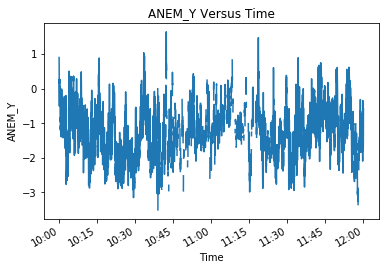

In [16]:
#Now we can combine the functions:
plotting_func(clip_function(tower,'2018-09-05 10:00:00','2018-09-05 12:00:00'),'ANEM_Y')